## Explore dataset

In [5]:
## imports and settings
import os
import re
import math
import itertools
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import networkx as nx
import warnings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('precision', 4)
warnings.simplefilter('ignore')
init_notebook_mode()

%matplotlib inline
import simplejson as json

In [6]:
## Explore input foler
os.listdir('/Users/xiaxun/Downloads/yelp_dataset')

['business.json',
 'Yelp_Dataset_Challenge_Round_13.pdf',
 'Dataset_Challenge_Dataset_Agreement.pdf',
 'user.json',
 'checkin.json',
 'tip.json',
 'review.json',
 'photo.json']

In [14]:
path = "/Users/xiaxun/Downloads/yelp_dataset/"
bz = []
for l in open(path+"business.json").readlines():
    bz.append(json.loads(l))
business = pd.DataFrame.from_records(bz) 
ur = []
for l in open(path+"user.json").readlines():
    ur.append(json.loads(l))
user = pd.DataFrame.from_records(ur) 
chin = []
for l in open(path+"checkin.json").readlines():
    chin.append(json.loads(l))
checkin = pd.DataFrame.from_records(chin) 
tp = []
for l in open(path+"tip.json").readlines():
    tp.append(json.loads(l))
tip = pd.DataFrame.from_records(tp) 
rv = []
for l in open(path+"review.json").readlines():
    rv.append(json.loads(l))
review = pd.DataFrame.from_records(rv) 
pho = []
for l in open(path+"photo.json").readlines():
    pho.append(json.loads(l))
photo = pd.DataFrame.from_records(pho) 

In [15]:
dnames = ['user', 'business', 'checkin', 'tip', 'photo','review']
## Explore shapes of datasets
for n, d in zip(dnames, [user, business, checkin, tip, photo, review]):
    print(n, d.shape)

user (1637138, 22)
business (192609, 14)
checkin (161950, 2)
tip (1223094, 5)
photo (200000, 4)
review (6685900, 9)


In [16]:
## First look at datasets
for n, d in zip(dnames, [user, business, checkin, tip, photo, review]):
    ## business_attrubutes is too many columns
    print('---------{0}---------'.format(n))
    if n != 'business_attributes':
        print(d.head(1).T)
    else:
        print(d.columns)

---------user---------
                                                                    0
user_id                                        l6BmjZMeQD3rDxWUbiAiow
name                                                           Rashmi
review_count                                                       95
yelping_since                                     2013-10-08 23:11:33
useful                                                             84
funny                                                              17
cool                                                               25
elite                                                  2015,2016,2017
friends             c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...
fans                                                                5
average_stars                                                    4.03
compliment_hot                                                      2
compliment_more                                                    

In [17]:
## Find keys in datasets
colnames = []
for d in [user, business, checkin, tip, photo, review]:
    colnames.extend(d.columns)
colnames = pd.Series(colnames).value_counts().reset_index()
colnames.columns = ['colname', 'cnt']
colnames[colnames['cnt'] > 1]

colname  cnt
0   business_id    5
1       user_id    3
2          date    3
3          name    2
4         stars    2
5          cool    2
6          text    2
7  review_count    2
8         funny    2
9        useful    2

### Keys are:

#### business_id- organization identifier ##
#### user_id - user identifier

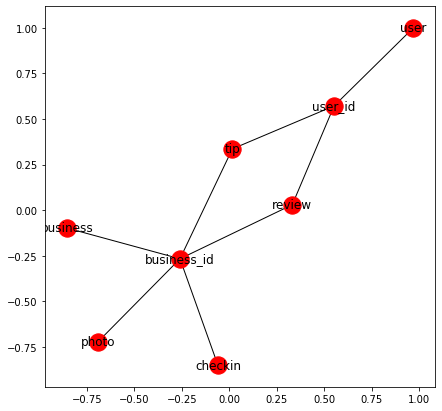

In [18]:
G = nx.Graph()
fig, ax = plt.subplots(figsize=[7,7])
for n, d in zip(dnames, [user, business, checkin, tip, photo, review]):
    _ = []
    for c in np.intersect1d(d.columns, ['business_id', 'user_id']):
        _.append([n, c])
    G.add_edges_from(_, label=n)
nx.draw_networkx(G, ax=ax)
plt.show()

#### Short summary:
#### users (_userid) make reviews and tips
#### every review and tip point out business (_buisinessid)
#### buisiness is Organization, it's profile is represented in buisiness_hours, buisiness_attributes, checkin